In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
from torchvision import transforms, utils
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import json

In [2]:
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

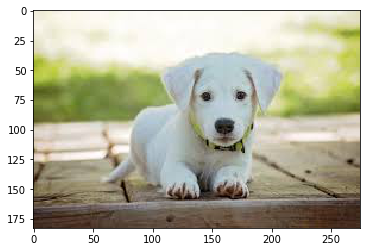

In [4]:
image = Image.open('C://Users//Vivek.Sasikumar//Downloads//dog.jpg')
plt.imshow(image)

In [5]:
vgg = models.vgg16(pretrained=True)

In [6]:
vgg.classifier[-1]    #vgg.classifier[6]

Linear(in_features=4096, out_features=1000, bias=True)

In [7]:
CUDA = torch.cuda.is_available()
if CUDA:
    vgg = vgg.cuda()

In [8]:
#Apply the transforms on the image
image = transform(image)

In [9]:
print(image.shape)

torch.Size([3, 224, 224])


In [10]:
#Add the batch size
image = image.unsqueeze(0)

In [11]:
#Wrap it up in a variable
image = Variable(image)

In [12]:
#Transfer it to the GPU
if CUDA:
    image = image.cuda()

In [13]:
print(image.shape)

torch.Size([1, 3, 224, 224])


In [14]:
output = vgg(image)

In [15]:
print(output.shape)

torch.Size([1, 1000])


In [16]:
#Transfer the 2D Tensor to 1D
output = output.squeeze(0)

In [17]:
print(output.shape)

torch.Size([1000])


In [20]:
pwd

'C:\\Users\\Vivek.Sasikumar\\Downloads\\The-Complete-Neural-Networks-Bootcamp-Theory-Applications-master'

In [22]:
labels = json.load(open('C:\\Users\\Vivek.Sasikumar\\Downloads\\The-Complete-Neural-Networks-Bootcamp-Theory-Applications-master\\imagenet-class-index.json'))

In [23]:
index = output.max(0)

In [24]:
print(index)

(tensor(10.9002, grad_fn=<MaxBackward0>), tensor(208))


In [25]:
index = str(index[1][0].item())
label = labels[index][1]

C:\Users\Vivek.Sasikumar\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  """Entry point for launching an IPython kernel.


In [26]:
print(label)

Labrador_retriever


In [27]:
module_list = list(vgg.features.modules())

In [28]:
print(vgg.features)
print(module_list[0])
print(module_list[1])
print(module_list[2])
module_list

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (1): ReLU(inplace)
   (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (3): ReLU(inplace)
   (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (6): ReLU(inplace)
   (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (8): ReLU(inplace)
   (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (11): ReLU(inplace)
   (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (13): ReLU(inplace)
   (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (15): ReLU(inplace)
   (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (17): Conv2d(256, 512, kernel_size=(3, 3), strid

In [29]:
outputs = []
names = []
for layer in module_list[1:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))

In [30]:
for feature_map in outputs:
    print(feature_map.shape)

torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 7, 7])


In [31]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    #Convert the 3D Tensor to 2D. Sum the same element of every channel
    gray_scale = torch.sum(feature_map, 0)
    gray_scale = gray_scale/feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())

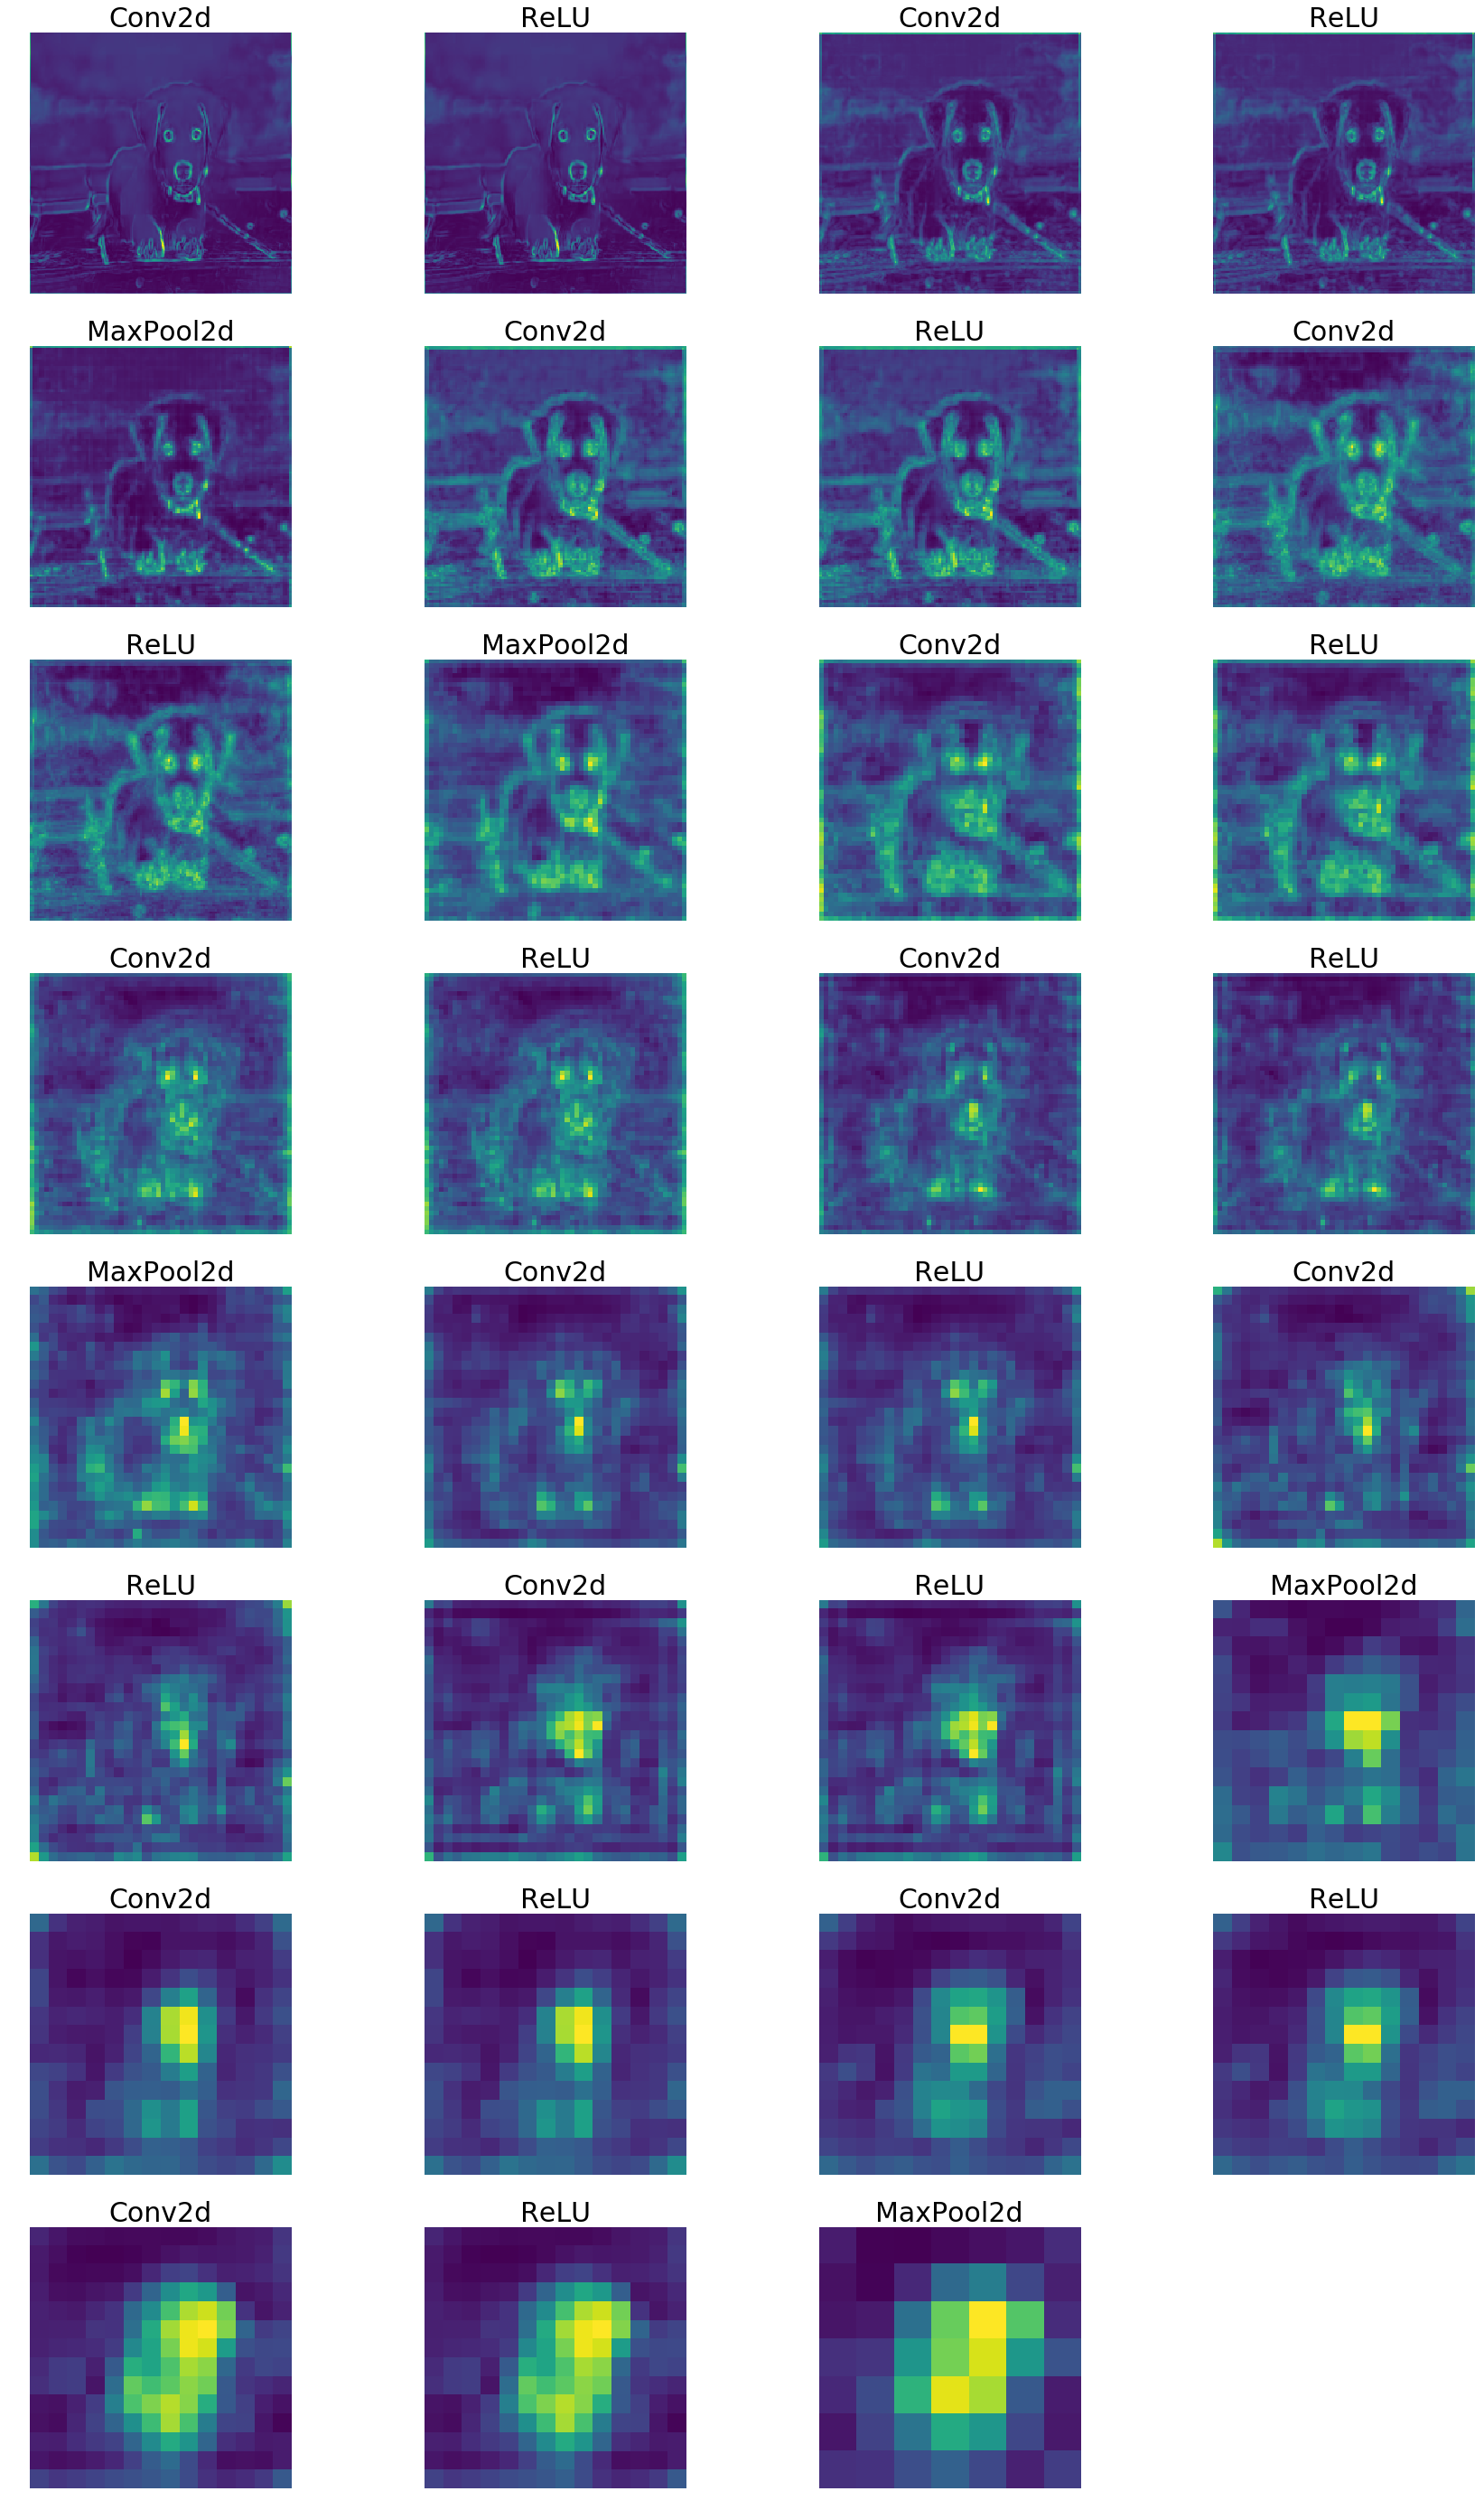

In [32]:
fig = plt.figure(figsize = (30,50))

for i in range(len(processed)):
    a = fig.add_subplot(8,4,i+1)
    imgplot = plt.imshow(processed[i])
    plt.axis('off')
    a.set_title(names[i].split('(')[0], fontsize=30)

plt.savefig('feature_maps.jpg', bbox_inches='tight')